## In this page I will write a code to fit Lorentzians to power spectra.

But first im going to extract Adams data and try fit that. Maybe my data is just a bit different to his?? Maybe thats why I cant get the same fit as his. This code is somewhere in my igrj17091 folder.

In [3]:
#tbh this way you can just edit the file names and do $python qdp_scrubber_mel.py and you don't need to mess around with notebooks 
#(I've commented lines of ########### to show where my original cells were! if you want to convert it back into a notebook)
import numpy as np
filename = '/home/c2032014/cygx1_paper/revive/lorentzian_fitting/nupco_obs1'
#infile names (I realise I had saved the qdps as .dat files already! the extension really doesn't matter since you just want to use matplotlib)
infile_path_eeuf = f'{filename}.qdp'
outfile_path_eeuf = f'{filename}.txt'
#using the different file extensions to distinguish between qdp's WData output and the "scrubbed" version we create
#
skip_line_indicator = ['READ','!','NO'] #will get caught on NO entries for data/uncertainties (be careful that none of these lines are in your data columns)
#####################################

TA_done = False
x_done = False
with open(infile_path_eeuf) as qdp, open(outfile_path_eeuf,'w') as txt:
    for i,line in enumerate(qdp):
        if not any(skip_line in line for skip_line in skip_line_indicator):
            #print('top')
            #print(line)
            #print(i)
            txt.write(line)
        else:
            #ah here (if i>2) is the source of the mismatch between number of channels 
            #(I'm lazy and not fixing this, but it means the output file will still include the "header lines" that aren't data or relevant)
            if i>2 and not TA_done:
                #print('bottom')
                print(i)
                TA_done = True
                TA_channels = i
            elif i>2 and TA_done and not x_done:
                x_done = True
                x_channels = i - TA_channels 

###############################
#print(x_channels)
#print(TA_channels)

48


In [4]:
adam=np.genfromtxt(outfile_path_eeuf).T

In [5]:
print(adam )

[[3.12500000e-02 6.25000000e-02 9.37500000e-02 ... 3.19307632e+01
  3.19584408e+01 3.19861431e+01]
 [1.56250000e-02 1.56250000e-02 1.56250000e-02 ... 1.38329482e-02
  1.38449389e-02 1.38569400e-02]
 [4.85159177e-03 9.94842965e-03 1.48713486e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.88999242e-04 4.22486337e-04 6.45030814e-04 ... 2.08153971e-03
  2.07977043e-03 2.07800278e-03]
 [3.75886630e-05 8.80749503e-05 1.41105804e-04 ... 7.25241916e-05
  7.24566053e-05 7.23890917e-05]
 [3.58540892e-05 8.82769964e-05 1.49043364e-04 ... 1.58865441e-05
  1.58722705e-05 1.58580096e-05]]


In [6]:
print(np.shape(adam))

(9, 8048)


In [7]:
freq=adam[0]
freq_err=adam[1]
power=adam[2]
power_err=adam[3]
e=adam[4]
f=adam[5]
g=adam[6]
h=adam[7]
i=adam[8]


In [8]:
print(i[:100])

[3.58540892e-05 8.82769964e-05 1.49043364e-04 2.21895971e-04
 3.09940602e-04 4.16797760e-04 5.46866155e-04 7.95142143e-04
 1.26931001e-03 1.95671571e-03 2.88462080e-03 4.16891463e-03
 5.06756175e-03 4.66837827e-03 3.53625533e-03 2.46594148e-03
 1.72869628e-03 1.24424719e-03 9.31899005e-04 7.19533535e-04
 5.72716759e-04 4.60428419e-04 3.78687750e-04 3.17896629e-04
 2.68918549e-04 2.29391386e-04 1.96214853e-04 1.68499784e-04
 1.46190447e-04 1.27512481e-04 1.11430010e-04 9.76940210e-05
 8.60017753e-05 7.60516486e-05 6.74322073e-05 5.99750238e-05
 5.34561295e-05 4.76939204e-05 4.26434199e-05 3.81819955e-05
 3.42615895e-05 3.07966802e-05 2.76963929e-05 2.49220393e-05
 2.24572614e-05 2.02518822e-05 1.82682688e-05 1.65812144e-05
 4.13987327e-05 4.14380120e-05 4.14773276e-05 4.15166869e-05
 4.15560862e-05 4.15955255e-05 4.16350049e-05 4.16745279e-05
 4.17140873e-05 4.17536903e-05 4.17933297e-05 4.18330164e-05
 4.18727395e-05 4.19125026e-05 4.19523094e-05 4.19921562e-05
 4.20320430e-05 4.207197

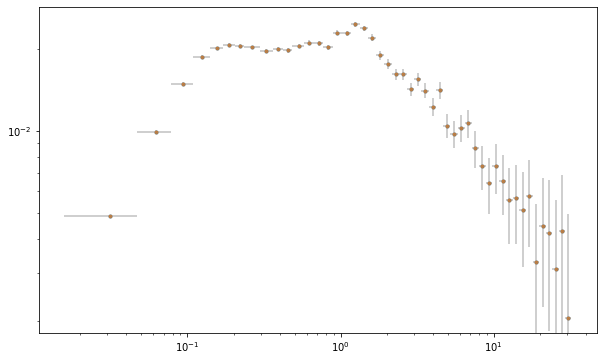

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(freq,power,'.')
plt.errorbar(freq,power, xerr=freq_err, yerr=power_err, fmt='.', ecolor='gray', alpha=0.5)
plt.xscale('log')
plt.yscale('log')


In [8]:
from lmfit.models import LinearModel, LorentzianModel
import numpy as np
from astropy.io import fits 
import importlib
import sys
sys.path.append('/home/c2032014/py_files')
import load_and_clean as lac


In [9]:
from stingray import Lightcurve, AveragedCrossspectrum


In [10]:
import matplotlib.pyplot as plt

In [11]:
data_12,*_=lac.load_and_clean('/home/c2032014/cygx1_paper/cyg_data_all/01002901/event_1pt5/ixpe01002901_det12_event_1pt5_src.fits', 51,200)
data_3,*_=lac.load_and_clean('/home/c2032014/cygx1_paper/cyg_data_all/01002901/event_1pt5/ixpe01002901_det3_evt_1pt5_v01_src.fits', 51,200)

In [12]:
GTI=np.loadtxt('/home/c2032014/cygx1_paper/cyg_data_all/01002901/GTI_ixpe01002901_evt2_v01.txt')

In [13]:
# Lightcurves
lc_12 = Lightcurve.make_lightcurve(data_12['TIME'], dt=1/64, gti=list(GTI))
lc_12.apply_gtis()
lc_3 = Lightcurve.make_lightcurve(data_3['TIME'], dt=1/64, gti=list(GTI))
lc_3.apply_gtis()


In [14]:

# Cross Spectrum
cs = AveragedCrossspectrum(lc_12, lc_3, 32)
cs=cs.rebin_log(f=0.1)

/home/c2032014/.local/lib/python3.10/site-packages/stingray/fourier.py:1139: RuntimeWarning: invalid value encountered in sqrt
  dRe = dIm = dG = np.sqrt(power_over_2n * (seg_power - frac))
/home/c2032014/.local/lib/python3.10/site-packages/stingray/fourier.py:1141: RuntimeWarning: invalid value encountered in sqrt
  dphi = np.sqrt(
/home/c2032014/.local/lib/python3.10/site-packages/stingray/crossspectrum.py:2912: UserWarning: Some error bars in the Averaged Crossspectrum are invalid.Defaulting to sqrt(2 / M) in Leahy norm, rescaled to the appropriate norm.
  warnings.warn(


In [15]:
print(cs.power)

[1.80374237e-01-1.41264149e-03j 1.65494244e-01-4.01960995e-03j
 1.62046484e-01-5.20232397e-03j 1.40849862e-01-4.47942391e-03j
 1.11856844e-01-3.21219691e-03j 8.82021494e-02-2.09689656e-03j
 7.42625030e-02-1.43086431e-03j 6.05660523e-02-2.22260039e-03j
 4.95500625e-02+7.26003504e-04j 4.13072562e-02+1.68184798e-04j
 3.72842248e-02-1.67836538e-03j 3.40003659e-02+1.71675792e-03j
 2.86600034e-02+6.50292395e-04j 2.44467299e-02-6.85275837e-05j
 2.42838150e-02+1.34478866e-05j 2.14695163e-02-1.20733535e-04j
 2.02036360e-02-4.27461323e-04j 1.76576917e-02+1.23019363e-05j
 1.44548415e-02+2.79862388e-04j 1.23760375e-02+7.36025793e-04j
 9.70073781e-03-1.18080932e-04j 8.01085086e-03-2.49640237e-04j
 7.12361226e-03+6.04588078e-05j 5.54946512e-03-1.22182712e-04j
 5.31688781e-03+5.85849631e-04j 4.57055012e-03-4.60103290e-04j
 3.77314519e-03-2.17617841e-04j 3.25720914e-03+2.35945810e-04j
 3.18498306e-03+7.56855316e-05j 2.18146721e-03+1.55018601e-04j
 1.70982631e-03-4.35498979e-04j 1.70787474e-03-6.792551

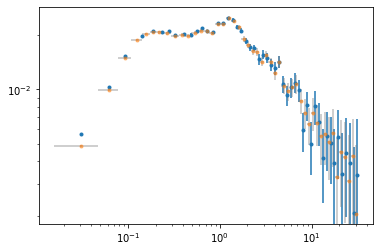

In [62]:
plt.figure()
plt.errorbar(cs.freq, cs.power.real*cs.freq,yerr=np.array(np.real(cs.power_err))*cs.freq, fmt='.')
plt.errorbar(freq,c, xerr=freq_err, yerr=power_err, fmt='.', ecolor='gray', alpha=0.5)
plt.xscale('log')
plt.yscale('log')


In [1]:
import scipy
print(scipy.__version__)


1.14.1


In [14]:
init_centers = [0.05, 1.18/2, 1.18, 0.001]
init_fwhm = [0.2, 0.97/2, 0.97, 5]
init_amplitudes = [0.1, 0.01, 0.03, 0.05]

# Convert FWHM to gamma (gamma = FWHM/2)
init_gamma = [fw/2 for fw in init_fwhm]

# Build p0 = [x01, gamma1, A1, x02, gamma2, A2, ...]
p0 = []
for xc, g, A in zip(init_centers, init_gamma, init_amplitudes):
    p0.extend([xc, g, A])

print("p0 =", p0)


p0 = [0.05, 0.1, 0.1, 0.59, 0.2425, 0.01, 1.18, 0.485, 0.03, 0.001, 2.5, 0.05]


Now attempting with Curvefit

In [12]:
init_centers = [0.05, 1.18/2, 1.18, 0.001]
init_fwhm = [0.2, 0.97/2, 0.97, 5]
init_amplitudes = [0.1, 0.01, 0.03, 0.05]

# Convert FWHM to gamma (gamma = FWHM/2)
init_gamma = [fw/2 for fw in init_fwhm]

# Build p0 = [x01, gamma1, A1, x02, gamma2, A2, ...]
p0 = []
for xc, g, A in zip(init_centers, init_gamma, init_amplitudes):
    p0.extend([xc, g, A])

print("p0 =", p0)



import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define a Lorentzian function
def lorentzian(x, x0, gamma, A):
    return (A * (gamma**2)) / ((x - x0)**2 + gamma**2)

# Define the sum of 4 Lorentzians
def four_lorentzians(x, x01, gamma1, A1,
                        x02, gamma2, A2,
                        x03, gamma3, A3,
                        x04, gamma4, A4):
    return (lorentzian(x, x01, gamma1, A1) +
            lorentzian(x, x02, gamma2, A2) +
            lorentzian(x, x03, gamma3, A3) +
            lorentzian(x, x04, gamma4, A4))

# Example: generate some synthetic data

xdata = cs.freq
ydata = cs.power.real

yerr=np.array(np.real(cs.power_err))

# Fit the data
popt, pcov = curve_fit(four_lorentzians, xdata, ydata, p0=p0,sigma=yerr, absolute_sigma=True,maxfev=2000)

# Extract best-fit parameters
print("Best-fit parameters:", popt)

# Plot results
plt.figure(figsize=(10,6))
plt.errorbar(xdata, ydata*xdata, xerr=cs.df/2, yerr=yerr*xdata,color='black' ,fmt='.', markersize=2, capsize=2, label="Data")
plt.scatter(xdata, ydata*xdata, s=10, label="Data")
plt.plot(xdata, four_lorentzians(xdata, *popt)*xdata, 'r-', label="Fit")

# Optionally plot individual Lorentzians
for i in range(4):
    xi, gi, Ai = popt[3*i:3*(i+1)]
    plt.plot(xdata, lorentzian(xdata, xi, gi, Ai)*xdata, '-', label=f"Lorentzian {i+1}")

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-3,0.03)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Power × freq")
plt.title("Fit of 4 Lorentzians")
plt.show()

chi_sqr=np.sum(((ydata - four_lorentzians(xdata, *popt)) / yerr)**2)
print(chi_sqr)

dof=len(ydata)-len(popt)
print("Degrees of freedom:", dof)
print("Reduced chi-squared:", chi_sqr/dof)
print(dof)


p0 = [0.05, 0.1, 0.1, 0.59, 0.2425, 0.01, 1.18, 0.485, 0.03, 0.001, 2.5, 0.05]


NameError: name 'cs' is not defined

In [18]:
#Performing an F test to see if the tied model is statistically worse than the untied model
# F-test calculation
import scipy
chi2_untied = chi_sqr  # From previous untied fit
ndof_untied = dof     # From previous untied fit
chi2_tied = chi2
ndof_tied = ndof

F = ((chi2_tied - chi2_untied) / (ndof_tied - ndof_untied)) / (chi2_untied / ndof_untied)
from scipy.stats import f
p_value = 1 - f.cdf(F, ndof_tied - ndof_untied, ndof_untied)
print(f"F-statistic: {F:.4g}, p-value: {p_value:.4g}")
confidence = 1.0 - p_value
significance = (2.0 ** 0.5) * scipy.special.erfinv(confidence)
print(f"Significance: {significance:.4g} sigma")

F-statistic: 0.306, p-value: 0.7382
Significance: 0.3342 sigma


Free fit parameters (10):
  x1     = 0.0371269  ± 0.00303276
  x3     = 1.16296  ± 0.0230425
  x4     = 0.42722  ± 1.09725
  g1     = 0.18712  ± 0.00402964
  g3     = 0.493996  ± 0.0555133
  g4     = 3.13171  ± 0.47087
  A1     = 0.166923  ± 0.00290645
  A2     = 0.00870152  ± 0.00126358
  A3     = 0.00956238  ± 0.00142182
  A4     = 0.00600869  ± 0.00308414

Full parameters (12, with ties):
  x1   = 0.0371269  ± 0.00303276
  g1   = 0.18712  ± 0.00402964
  A1   = 0.166923  ± 0.00290645
  x2   = 0.581478  ± 0.0115212
  g2   = 0.246998  ± 0.0277567
  A2   = 0.00870152  ± 0.00126358
  x3   = 1.16296  ± 0.0230425
  g3   = 0.493996  ± 0.0555133
  A3   = 0.00956238  ± 0.00142182
  x4   = 0.42722  ± 1.09725
  g4   = 3.13171  ± 0.47087
  A4   = 0.00600869  ± 0.00308414

Chi2 = 103.9, reduced Chi2 = 2.663 (ndof = 39)


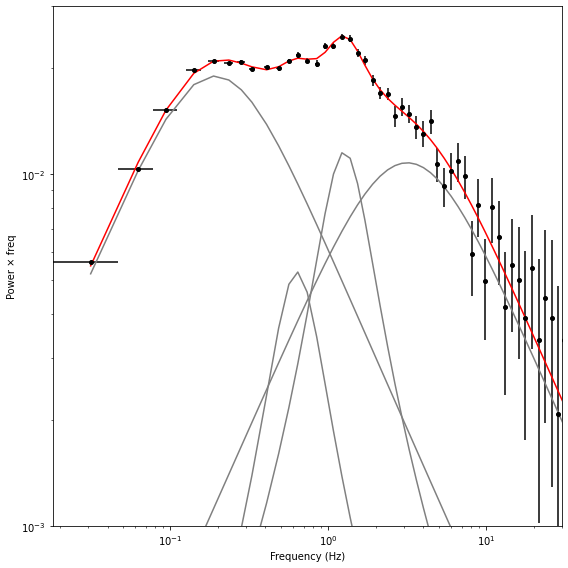

In [25]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# -------------------------
# Your initial guesses
init_centers = [0.05, 1.18/2, 1.18, 0.001]
init_fwhm = [0.2, 0.97/2, 0.97, 5]
init_amplitudes = [0.1, 0.01, 0.03, 0.05]

# Convert FWHM -> gamma = FWHM/2
init_gamma = [fw/2 for fw in init_fwhm]

# Build initial parameter vector for tied model
# Free params order: [x1, x3, x4, gamma1, gamma3, gamma4, A1, A2, A3, A4]
p0_tied = [
    init_centers[0],   # x1
    init_centers[2],   # x3
    init_centers[3],   # x4
    init_gamma[0],     # g1
    init_gamma[2],     # g3
    init_gamma[3],     # g4
    init_amplitudes[0],# A1
    init_amplitudes[1],# A2
    init_amplitudes[2],# A3
    init_amplitudes[3] # A4
]

# -------------------------
# Lorentzian
def lorentzian(x, x0, gamma, A):
    return (A * (gamma**2)) / ((x - x0)**2 + gamma**2)

# Model with ties
def four_lorentzians_tied(x, x1, x3, x4, gamma1, gamma3, gamma4, A1, A2, A3, A4):
    x2 = 0.5 * x3
    g2 = 0.5 * gamma3
    return (lorentzian(x, x1, gamma1, A1) +
            lorentzian(x, x2, g2, A2) +
            lorentzian(x, x3, gamma3, A3) +
            lorentzian(x, x4, gamma4, A4))

# -------------------------
# Your data
ydata = cs.power.real
xdata = cs.freq
yerr = np.array(np.real(cs.power_err))

# Fit
popt, pcov = curve_fit(four_lorentzians_tied, xdata, ydata, p0=p0_tied,
                       sigma=yerr, absolute_sigma=True, method='dogbox')
perr_free = np.sqrt(np.diag(pcov))

param_names_free = ["x1","x3","x4","g1","g3","g4","A1","A2","A3","A4"]

# -------------------------
# Expand to full 12 parameters
def build_full_params(popt, perr_free):
    x1, x3, x4, g1, g3, g4, A1, A2, A3, A4 = popt
    x2 = 0.5 * x3
    g2 = 0.5 * g3
    full_params = np.array([x1, g1, A1,
                            x2, g2, A2,
                            x3, g3, A3,
                            x4, g4, A4])

    perr_full = np.zeros(12)
    perr_full[0]  = perr_free[0]   # x1
    perr_full[1]  = perr_free[3]   # g1
    perr_full[2]  = perr_free[6]   # A1
    perr_full[3]  = 0.5 * perr_free[1]   # x2 tied
    perr_full[4]  = 0.5 * perr_free[4]   # g2 tied
    perr_full[5]  = perr_free[7]   # A2
    perr_full[6]  = perr_free[1]   # x3
    perr_full[7]  = perr_free[4]   # g3
    perr_full[8]  = perr_free[8]   # A3
    perr_full[9]  = perr_free[2]   # x4
    perr_full[10] = perr_free[5]   # g4
    perr_full[11] = perr_free[9]   # A4

    return full_params, perr_full

full_params, perr_full = build_full_params(popt, perr_free)

# -------------------------
# Print results
print("Free fit parameters (10):")
for name, val, err in zip(param_names_free, popt, perr_free):
    print(f"  {name:6s} = {val:.6g}  ± {err:.6g}")

param_names_full = ["x1","g1","A1","x2","g2","A2","x3","g3","A3","x4","g4","A4"]
print("\nFull parameters (12, with ties):")
for name, val, err in zip(param_names_full, full_params, perr_full):
    print(f"  {name:4s} = {val:.6g}  ± {err:.6g}")

# -------------------------
# Chi-square
yfit = four_lorentzians_tied(xdata, *popt)
chi2 = np.sum(((ydata - yfit) / yerr) ** 2)
ndof = len(xdata) - len(popt)
chi2_red = chi2 / ndof
print(f"\nChi2 = {chi2:.4g}, reduced Chi2 = {chi2_red:.4g} (ndof = {ndof})")

# -------------------------
# Plot
plt.figure(figsize=(8,8))
plt.errorbar(xdata, ydata * xdata, xerr=(cs.df/2),
             yerr=(yerr * xdata), color='black', fmt='o', ms=4, label='data')
plt.plot(xdata, yfit * xdata, label='fit', color='red')

x = xdata
x1, x3, x4, g1, g3, g4, A1, A2, A3, A4 = popt
x2 = 0.5 * x3
g2 = 0.5 * g3

comp1 = lorentzian(x, x1, g1, A1)
comp2 = lorentzian(x, x2, g2, A2)
comp3 = lorentzian(x, x3, g3, A3)
comp4 = lorentzian(x, x4, g4, A4)

plt.plot(x, comp1 * x, label='L1', color='grey')
plt.plot(x, comp2 * x, label='L2 (tied)',color='grey')
plt.plot(x, comp3 * x, label='L3', color='grey')
plt.plot(x, comp4 * x, label='L4', color='grey')

#plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power × freq')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3, 0.03)
plt.xlim(0.018, 30)
plt.tight_layout()
plt.show()




In [8]:
8.39189E-06 *2

1.678378e-05

In [7]:
48.84/38, 

(1.2852631578947369,)

## Now I have the fitting and statistics code up and running, im now going to find best fits for each dataset we consider in the Cygnus X-1 Paper

In [39]:
data_to_save = np.column_stack([
    xdata,           # Frequency
    ydata,
    xerr,
    yerr,   # Original data
    yfit,       # Total fit
    comp1,
    comp2,
    comp3,
    comp4
])

np.savetxt("lorentzian01002901_plt_data.txt", data_to_save,
           header="freq(Hz) power xerr yerr yfit comp1 comp2 comp3 comp4")

print("Data saved to fit_data.txt")

Data saved to fit_data.txt


Initial parameters: [0.0377902  0.369655   0.0541798  0.00558012 1.1778     0.964521
 0.0122651  0.5889     0.48226    0.00558012]

Best-fit parameters: [0.03712681 0.1871206  0.16692313 0.00870165 1.16295501 0.49399816
 0.00956251 0.42736162 3.13173532 0.00600837]


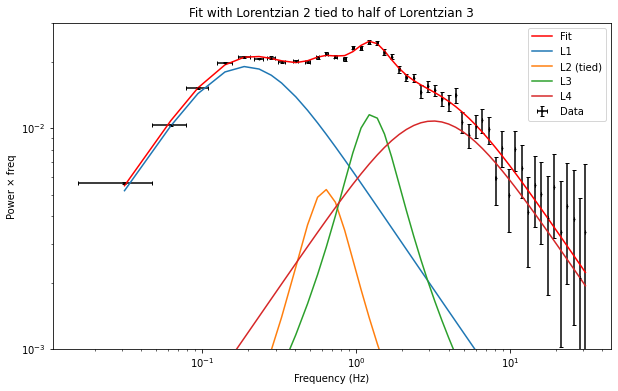

Chi-squared: 103.86069416582637
DOF: 39
Reduced chi-squared: 2.6630947222006762

=== Best-fit Parameters ===
Lorentzian 1: x0 = 0.0371268, gamma = 0.187121, A = 0.166923
Lorentzian 2 (TIED): x0 = 0.5*x03 = 0.581478, gamma = 0.5*gamma3 = 0.246999, A = 0.00870165
Lorentzian 3: x0 = 1.16296, gamma = 0.493998, A = 0.00956251
Lorentzian 4: x0 = 0.427362, gamma = 3.13174, A = 0.00600837

Tied parameter relationships enforced:
   x02 = 0.5 * x03
   gamma2 = 0.5 * gamma3


In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- Lorentzian Shape ---
def lorentzian(x, x0, gamma, A):
    return (A * gamma**2) / ((x - x0)**2 + gamma**2)

# --- Model with Lorentzian #2 tied to half of Lorentzian #3 ---
def lorentzians_tied_2nd_to_3rd(x,
                                x01, gamma1, A1,     # L1
                                A2,                  # L2 amplitude only
                                x03, gamma3, A3,     # L3 (L2 tied to this)
                                *rest):              # extra Lorentzians if present
    x02  = 0.5 * x03
    g2   = 0.5 * gamma3
    
    y = lorentzian(x, x01,    gamma1, A1)
    y += lorentzian(x, x02,   g2,     A2)
    y += lorentzian(x, x03,   gamma3, A3)
    
    # Additional Lorentzians (if any)
    if len(rest) > 0:
        for i in range(len(rest)//3):
            xi, gi, Ai = rest[3*i:3*(i+1)]
            y += lorentzian(x, xi, gi, Ai)
    return y

# --- Initial Guess Setup ---

init_centers=[ 3.77902E-02,0.588900 ,1.17780,0.588900]
init_fwhm=[0.369655,0.482260,0.964521,0.482260]
init_amplitudes=[5.41798E-02,5.58012E-03,1.22651E-02, 5.58012E-03]
#init_centers = [0.3, 1, 2, 6]
#init_fwhm = [0.2, 0.8/2, 0.8, 5]
#init_amplitudes = [0.1, 0.01, 0.03, 0.05]

init_gamma = [2*fw/2 for fw in init_fwhm]

init_gamma=[fw for fw in init_fwhm]

# Assign parameters for tied model
x01, gamma1, A1 = init_centers[0], init_gamma[0], init_amplitudes[0]
A2 = init_amplitudes[1]
x03, gamma3, A3 = init_centers[2], init_gamma[2], init_amplitudes[2]

extra = []
for xc, g, A in zip(init_centers[3:], init_gamma[3:], init_amplitudes[3:]):
    extra.extend([xc, g, A])

p0 = np.array([x01, gamma1, A1, A2, x03, gamma3, A3] + extra)

print("Initial parameters:", p0)

# --- Data ---
xdata = cs.freq
ydata = cs.power.real
yerr = np.real(cs.power_err)

# --- Bounds (Very Important!) ---
fmin, fmax = np.min(xdata), np.max(xdata)

bounds_low = [fmin, 1e-6, 0,   0,   fmin, 1e-6, 0]
bounds_high= [fmax, 10,   1e6, 1e6, fmax, 10, 1e6]

if len(extra) > 0:
    n_extra = len(extra)//3
    bounds_low += [fmin, 1e-6, 0] * n_extra
    bounds_high += [fmax, 10, 1e6   ] * n_extra

bounds = (bounds_low, bounds_high)

# --- Multi-start global fit ---
best_popt = None
best_chi = np.inf

for trial in range(30):  # try 30 randomized initial guesses
    p0_try = p0 * np.random.uniform(0.5, 1.8, size=len(p0))
    try:
        popt_try, pcov_try = curve_fit(
            lorentzians_tied_2nd_to_3rd,
            xdata, ydata,
            p0=p0_try,
            sigma=yerr,
            absolute_sigma=True,
            bounds=bounds,
            method='trf',
            maxfev=200000
        )
        model_try = lorentzians_tied_2nd_to_3rd(xdata, *popt_try)
        chi_try = np.sum(((ydata - model_try)/yerr)**2)

        if chi_try < best_chi:
            best_chi = chi_try
            best_popt = popt_try
            best_pcov = pcov_try
    except:
        pass

popt = best_popt
pcov = best_pcov

print("\nBest-fit parameters:", popt)

# --- Plot ---
model = lorentzians_tied_2nd_to_3rd(xdata, *popt)

plt.figure(figsize=(10,6))
plt.errorbar(xdata, ydata*xdata, xerr=cs.df/2, yerr=yerr*xdata,
             fmt='.', color='black', markersize=2, capsize=2, label="Data")
plt.plot(xdata, model*xdata, 'r-', label="Fit")

# Individual components:
x01, gamma1, A1 = popt[0:3]
A2 = popt[3]
x03, gamma3, A3 = popt[4:7]
x02 = 0.5*x03
g2 = 0.5*gamma3

plt.plot(xdata, lorentzian(xdata, x01, gamma1, A1)*xdata, '-', label="L1")
plt.plot(xdata, lorentzian(xdata, x02, g2,     A2)*xdata, '-', label="L2 (tied)")
plt.plot(xdata, lorentzian(xdata, x03, gamma3, A3)*xdata, '-', label="L3")

rest = popt[7:]
if len(rest)>0:
    for i in range(len(rest)//3):
        xi, gi, Ai = rest[3*i:3*(i+1)]
        plt.plot(xdata, lorentzian(xdata, xi, gi, Ai)*xdata, '-', label=f"L{4+i}")

plt.ylim(1e-3, 0.03)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power × freq")
plt.title("Fit with Lorentzian 2 tied to half of Lorentzian 3")
plt.show()

# --- Chi-square ---
chi_sqr = np.sum(((ydata - model) / yerr)**2)
dof = len(ydata) - len(popt)
print("Chi-squared:", chi_sqr)
print("DOF:", dof)
print("Reduced chi-squared:", chi_sqr/dof)
# ---- Clear Parameter Output ----

print("\n=== Best-fit Parameters ===")
param_names = []

# Extract free parameters
x01, gamma1, A1 = popt[0:3]
A2 = popt[3]          # free
x03, gamma3, A3 = popt[4:7]

# Compute tied parameters
x02 = 0.5 * x03
gamma2 = 0.5 * gamma3

# Print first three Lorentzians clearly
print(f"Lorentzian 1: x0 = {x01:.6g}, gamma = {gamma1:.6g}, A = {A1:.6g}")
print(f"Lorentzian 2 (TIED): x0 = 0.5*x03 = {x02:.6g}, gamma = 0.5*gamma3 = {gamma2:.6g}, A = {A2:.6g}")
print(f"Lorentzian 3: x0 = {x03:.6g}, gamma = {gamma3:.6g}, A = {A3:.6g}")

# Any extra Lorentzians?
rest = popt[7:]
if len(rest) > 0:
    n_extra = len(rest)//3
    for i in range(n_extra):
        xi, gi, Ai = rest[3*i:3*(i+1)]
        print(f"Lorentzian {4+i}: x0 = {xi:.6g}, gamma = {gi:.6g}, A = {Ai:.6g}")

print("\nTied parameter relationships enforced:")
print("   x02 = 0.5 * x03")
print("   gamma2 = 0.5 * gamma3")



Free fit parameters (10):
x1   = 0.0371264 ± 0.0030326
x3   = 1.16295 ± 0.0230412
x4   = 0.427789 ± 1.09704
g1   = 0.187122 ± 0.00402859
g3   = 0.494014 ± 0.0555039
g4   = 3.13189 ± 0.470583
A1   = 0.166924 ± 0.00290486
A2   = 0.00870208 ± 0.00126308
A3   = 0.00956303 ± 0.0014214
A4   = 0.00600719 ± 0.00308192

Full parameters (12, with ties):
x1   = 0.0371264 ± 0.0030326
g1   = 0.187122 ± 0.00402859
A1   = 0.166924 ± 0.00290486
x2   = 0.581477 ± 0.0115206
g2   = 0.247007 ± 0.0277519
A2   = 0.00870208 ± 0.00126308
x3   = 1.16295 ± 0.0230412
g3   = 0.494014 ± 0.0555039
A3   = 0.00956303 ± 0.0014214
x4   = 0.427789 ± 1.09704
g4   = 3.13189 ± 0.470583
A4   = 0.00600719 ± 0.00308192

Chi2 = 103.9, reduced Chi2 = 2.663 (ndof=39)


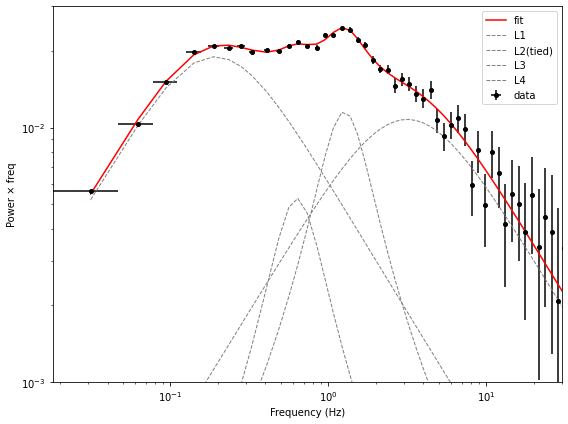

In [26]:
import numpy as np
from scipy.optimize import curve_fit, least_squares
import matplotlib.pyplot as plt

# -------------------------
# Initial guesses
init_centers = [0.05, 1.18/2, 1.18, 0.001]
init_fwhm    = [0.2, 0.97/2, 0.97, 5]
init_amplitudes = [0.1, 0.01, 0.03, 0.05]

# Convert FWHM -> gamma = FWHM/2
init_gamma = [fw/2 for fw in init_fwhm]

# Free params: [x1, x3, x4, gamma1, gamma3, gamma4, A1, A2, A3, A4]
p0_tied = [
    init_centers[0], init_centers[2], init_centers[3],
    init_gamma[0],   init_gamma[2],   init_gamma[3],
    init_amplitudes[0], init_amplitudes[1], init_amplitudes[2], init_amplitudes[3]
]

# -------------------------
# Lorentzian function
def lorentzian(x, x0, gamma, A):
    return (A * gamma**2) / ((x - x0)**2 + gamma**2)

# Tied 4-Lorentzian model
def four_lorentzians_tied(x, x1, x3, x4, g1, g3, g4, A1, A2, A3, A4):
    x2 = 0.5 * x3
    g2 = 0.5 * g3
    return (lorentzian(x, x1, g1, A1) +
            lorentzian(x, x2, g2, A2) +
            lorentzian(x, x3, g3, A3) +
            lorentzian(x, x4, g4, A4))

# -------------------------
# Your data
ydata = cs.power.real
xdata = cs.freq
yerr = np.array(np.real(cs.power_err))

# -------------------------
# Bounds for optimizer (wide enough to allow flexibility)
lower_bounds = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
upper_bounds = [np.inf]*10

# -------------------------
# Optional: try multiple initial guesses to escape local minima
best_chi2 = np.inf
best_popt = None
n_trials = 5

for _ in range(n_trials):
    # small random perturbation around initial guess
    p0_trial = np.array(p0_tied) * (1 + 0.1 * np.random.randn(len(p0_tied)))
    
    try:
        popt_trial, pcov_trial = curve_fit(
            four_lorentzians_tied, xdata, ydata, p0=p0_trial,
            sigma=yerr, absolute_sigma=True,
            bounds=(lower_bounds, upper_bounds), method='trf'
        )
        yfit_trial = four_lorentzians_tied(xdata, *popt_trial)
        chi2_trial = np.sum(((ydata - yfit_trial)/yerr)**2)
        
        if chi2_trial < best_chi2:
            best_chi2 = chi2_trial
            best_popt = popt_trial
            best_pcov = pcov_trial
    except RuntimeError:
        # fit failed, skip
        continue

popt = best_popt
pcov = best_pcov
perr_free = np.sqrt(np.diag(pcov))

# -------------------------
# Expand full 12-parameter set including tied x2/g2
def build_full_params(popt, perr_free):
    x1, x3, x4, g1, g3, g4, A1, A2, A3, A4 = popt
    x2, g2 = 0.5*x3, 0.5*g3
    full_params = np.array([x1,g1,A1, x2,g2,A2, x3,g3,A3, x4,g4,A4])
    
    perr_full = np.zeros(12)
    perr_full[0], perr_full[1], perr_full[2] = perr_free[0], perr_free[3], perr_free[6]
    perr_full[3], perr_full[4], perr_full[5] = 0.5*perr_free[1], 0.5*perr_free[4], perr_free[7]
    perr_full[6], perr_full[7], perr_full[8] = perr_free[1], perr_free[4], perr_free[8]
    perr_full[9], perr_full[10], perr_full[11] = perr_free[2], perr_free[5], perr_free[9]
    
    return full_params, perr_full

full_params, perr_full = build_full_params(popt, perr_free)

# -------------------------
# Print results
param_names_free = ["x1","x3","x4","g1","g3","g4","A1","A2","A3","A4"]
print("Free fit parameters (10):")
for name, val, err in zip(param_names_free, popt, perr_free):
    print(f"{name:4s} = {val:.6g} ± {err:.6g}")

param_names_full = ["x1","g1","A1","x2","g2","A2","x3","g3","A3","x4","g4","A4"]
print("\nFull parameters (12, with ties):")
for name, val, err in zip(param_names_full, full_params, perr_full):
    print(f"{name:4s} = {val:.6g} ± {err:.6g}")

# -------------------------
# Chi-square
yfit = four_lorentzians_tied(xdata, *popt)
chi2 = np.sum(((ydata - yfit)/yerr)**2)
ndof = len(xdata) - len(popt)
chi2_red = chi2/ndof
print(f"\nChi2 = {chi2:.4g}, reduced Chi2 = {chi2_red:.4g} (ndof={ndof})")

# -------------------------
# Plot
plt.figure(figsize=(8,6))
plt.errorbar(xdata, ydata*xdata, xerr=(cs.df/2), yerr=yerr*xdata,
             fmt='o', color='black', ms=4, label='data')
plt.plot(xdata, yfit*xdata, color='red', label='fit')

# Individual components
x1, x3, x4, g1, g3, g4, A1, A2, A3, A4 = popt
x2, g2 = 0.5*x3, 0.5*g3

for comp, label in zip(
    [lorentzian(xdata,x1,g1,A1), lorentzian(xdata,x2,g2,A2),
     lorentzian(xdata,x3,g3,A3), lorentzian(xdata,x4,g4,A4)],
    ['L1','L2(tied)','L3','L4']
):
    plt.plot(xdata, comp*xdata, color='grey', lw=1, ls='--', label=label)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power × freq')
plt.ylim(1e-3, 0.03)
plt.xlim(0.018, 30)
plt.legend()
plt.tight_layout()
plt.show()
